### EDA on Titanic Dataset 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
train = pd.read_csv("titanic.csv")

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Exploratory Data Analysis
# Start by checking missing data. 
# Use seaborn to create a sample heatmap to we've missing data

In [26]:
train.isnull() # Can't be used for large data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


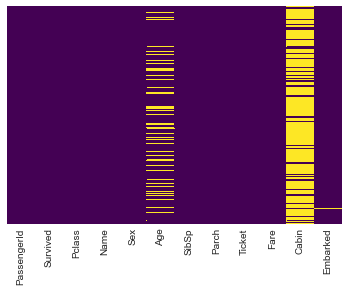

In [27]:
# Visualization way to check.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

20 percentage of the Age data is missing. The portion of Age missing is likely small enough for reasonable replacement with some form of imputation looking at the cabin column. It looks like we are just missing too much data useful.

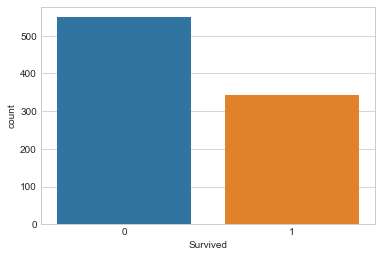

In [28]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', data= train)

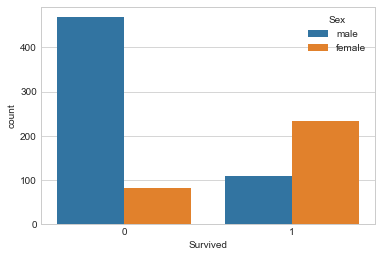

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

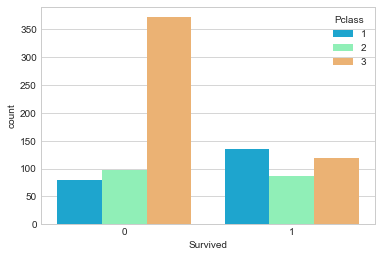

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data = train, palette='rainbow')

AttributeError: 'Rectangle' object has no property 'normed'

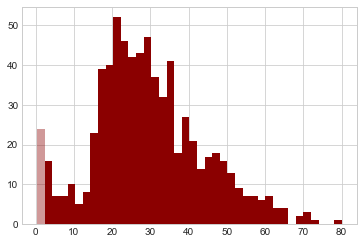

In [31]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40) 

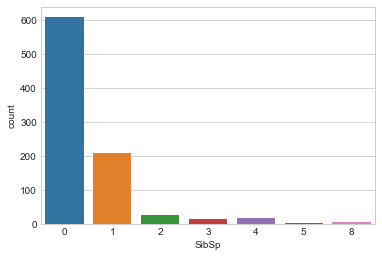

In [32]:
sns.countplot(x='SibSp',data=train)

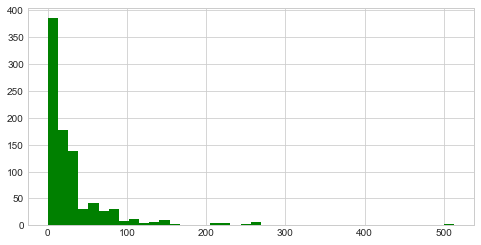

In [33]:
train['Fare'].hist(color='green',bins=40,figsize = (8,4))

### Data Clearning
we need to fill in missing age data instead of dropping the missing age row data. One way to do this by filling in the mean of all age of passengers(imputation). 

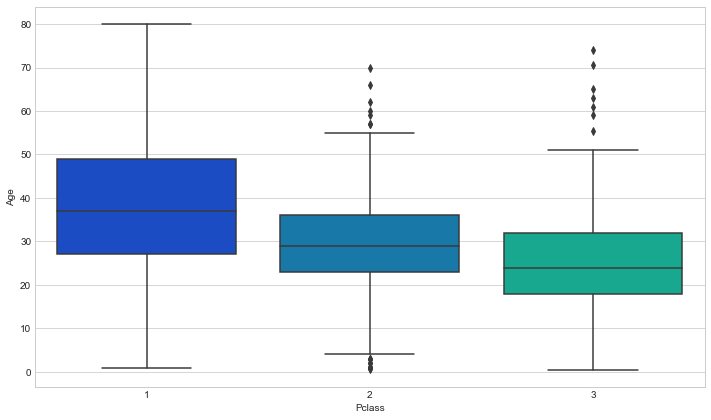

In [34]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [35]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [36]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis= 1)

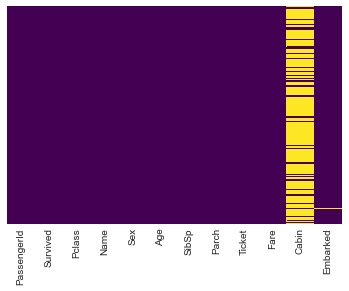

In [37]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
train.drop('Cabin', axis= 1, inplace= True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Converting Categorical Features
Converting categorical features to dummy variables using pandas for machine learning model to take those features as inputs.

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [44]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [45]:
sex = pd.get_dummies(train['Sex'], drop_first= True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [46]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [48]:
train = pd.concat([train,sex,embark],axis=1)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Logistic Regression Model
Splitting data into training set and test set

In [83]:
train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [95]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),train['Survived'],test_size=0.30,random_state=101)

In [98]:
# Training and Predicting
from sklearn.linear_model import LogisticRegression

In [99]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\mrgan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [100]:
prediction = logmodel.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
accuracy = confusion_matrix(y_test, prediction)

In [103]:
accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.7686567164179104